## TensorFlow CNN操作测试

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 1)一些可能经常使用到的方法

In [14]:
# 权重值的初始化
def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(initial)

# 偏好值初始化
def bias_variable(shape):
    initial=tf.constant(0.1,shape=shape)
    return tf.Variable(initial)

# 卷积过程
def conv2d(x,W):
    return tf.nn.conv2d(input=x,filter=W,strides=[1,1,1,1],padding='SAME')

# 池化过程
def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],
                         strides=[1,2,2,1],padding='SAME')



### 2)读取一张小猫的图片

In [15]:
cat = tf.gfile.FastGFile('images/timg.jpg','rb').read()
image = tf.image.decode_jpeg(cat)

### 3)因为是tensorflow读的，所以使用的使用需要用session

(435, 580, 3)


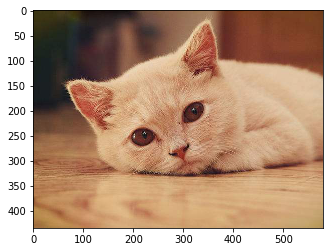

In [16]:
with tf.Session() as sess:
    #输出图像的大小（高，长，通道数）
    print(image.eval().shape)
    plt.figure(1)
    plt.imshow(image.eval())
    

### 4)单步测试，大概的流程就是下面的语句

In [17]:
# image = tf.cast(image,tf.float32)
# cat_batch = tf.reshape(image,[1,435,580,3])
# W = weight_variable([3,3,3,3])
# op = tf.nn.conv2d(cat_batch, W, strides=[1, 1, 1, 1], padding='SAME',use_cudnn_on_gpu=False)
# conv =tf.reshape(tf.cast(op,tf.uint8),[435,580,3])

### 5)测试部分写成了一个方法

In [18]:
def conv_test(image,batch):
    #图片读取的时候，数据类型是tf.uint8，需要进行一下转换
    image = tf.cast(image,tf.float32)
    
    #并将图片的维度进行调整
    cat_batch = tf.reshape(image,[1,435,580,3])
    
    #设定卷积层的大小，batch随意，第一个3表示通道数，因为图片是用rbg表示，所以是三通道，第二个3是输出的层数，也就是想要生成多少个卷积池
    #这里用的是3个，因为刚好经过一步卷积之后，维度还是三维，可以直接以图像的形式输出，正常情况下是不需要固定为3的，其他都可以
    W = weight_variable([batch,batch,3,3])
    
    # 卷积的过程
    op = tf.nn.conv2d(cat_batch, W, strides=[1, 1, 1, 1], padding='SAME',use_cudnn_on_gpu=False)
    
    # 经过卷积生成的是tf.float32的，所以要想图像输出，需要转化为tf.uint8
    conv =tf.reshape(tf.cast(op,tf.uint8),[435,580,3])
    return conv



### 6) 测试，我的卷积大小从1\*1 到10\*10，分别变化后输出 



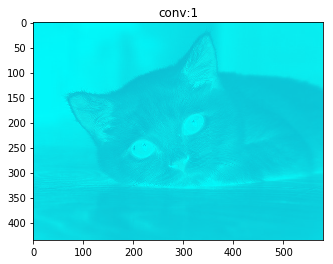

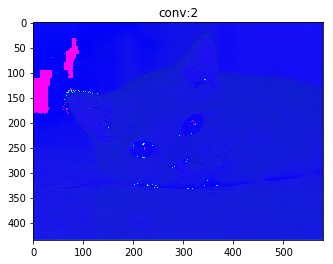

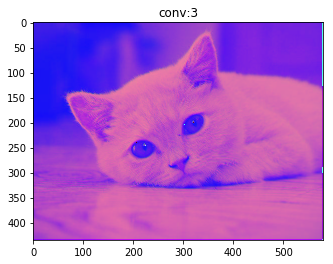

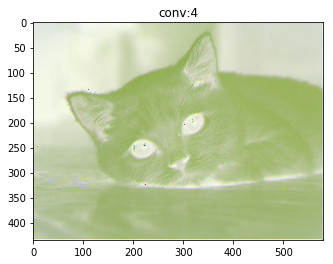

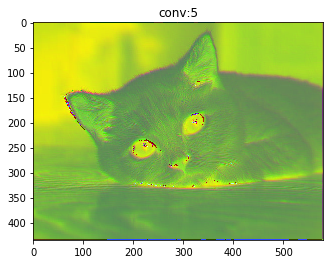

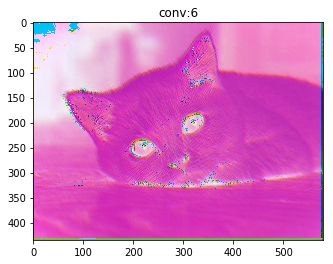

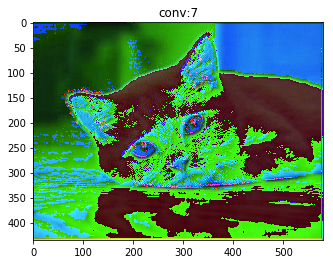

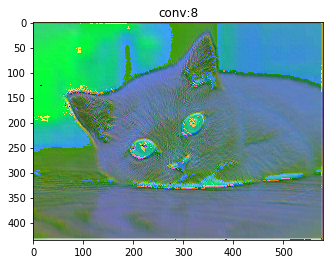

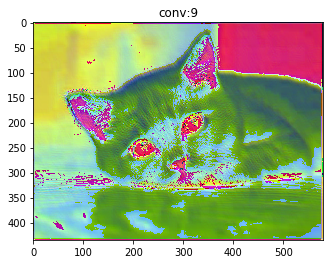

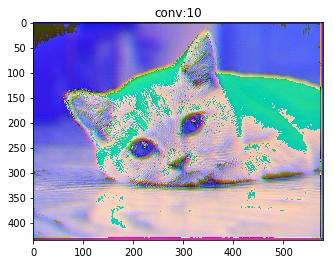

In [19]:
mylist = []
for i in range(10):
    n=i+1
    mylist.append(conv_test(image,n))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    n=0
    for i in mylist:
        n=n+1
        test = sess.run(i)
        plt.figure(n)
        plt.title('conv:{}'.format(n))
        plt.imshow(test)
  
    

**可以看出1\*1的就相当于是给图片打上了一层滤镜，因为相当于把里面的通道值都乘以了一个数。例如以前如果是红色（0,0,255）就会变化成（0\*X,0\*X,255\*X），就变成这个样子了**
    